#Laboratorio 3

# Importo Le Librerie

In [ ]:
import math
import numpy as np  
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit 
from scipy import odr
from ipywidgets import interact, interact_manual, FloatSlider, Checkbox, BoundedFloatText
from google.colab import files
from pprint import pprint

# Circuito RLC

## Importo I Dati


 I dati comprendono 

 1. Tensione in entrata (Volt)
 2. Tensione in uscita (Volt)
 3. Frequenza / pulsazione (Hz)

In [ ]:
tensioni_in_uscita = [1.28, 1.6, 1.92, 2.24, 2.72, 3.28, 3.44, 3.68, 3.84, 4.24, 4.160, 3.92, 3.6, 3.44, 3.12, 2.8, 2.64, 2.16, 1.92, 1.6, 1.44, 1.28, ]

tensioni_in_entrata = [4.24] * len(tensioni_in_uscita)

frequenze = [12180, 12750, 13180, 13550, 14000, 14370, 14460, 14630, 14740, 15160, 15620, 15860, 16100, 16240, 16500, 16710, 16960, 17500, 17910, 18450, 19290, 20000, ]

pulsazioni = [2 * math.pi * i for i in frequenze]

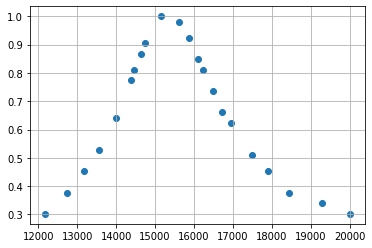

In [ ]:
y = [tensioni_in_uscita[i]/tensioni_in_entrata[i] for i in range(len(tensioni_in_entrata))]
x = frequenze

plt.scatter(x, y)
plt.grid()
#plt.xscale("log")

x = np.array(pulsazioni)
y = np.array(y)

## Eseguo Il Fit

### Fit Routine

In [ ]:
def funzione_fit(o, w): 
    return 1 / np.sqrt( (1 + (o[1]))**2  + (w * o[2] - 1 / (w * o[3]))**2 )
 
def fitplot(w, G, A, B, C, D, print_output=True, plot_guess=False):

  risonanza_model = odr.Model(funzione_fit)
  fit_data = odr.RealData(w, G)
  beta0 = np.array([A, B, C, D]) #array of initial guesses

  print(beta0)
  fit = odr.ODR(fit_data, risonanza_model, beta0=beta0)
  global out
  out = fit.run()

  sample_w = np.arange(10000 * 6, 30000 * 6, 1)
  plt.show()

  plt.figure(figsize=(9, 6))

  if plot_guess:
      plt.plot(sample_w, funzione_fit(beta0,sample_w),'--', color=[0.3,0.7,0], label="Guess", linewidth=2) # plot guess

#plotting fit result
  plt.plot(sample_w, funzione_fit(out.beta, sample_w), color=[1,0,0], linewidth=2)
  plt.scatter(x, y)
  plt.title("Grafico")
  plt.xlabel("frequenza (1/s)")
  plt.xscale("log")
  plt.ylabel("Ampiezza (V)")
  plt.grid(which='both')
  plt.legend()
  plt.show()

  plt.plot(sample_w, funzione_fit(out.beta, sample_w), color=[1,0,0], linewidth=2)
  plt.scatter(x, y)
  plt.title("Grafico")
  plt.xlabel("frequenza (1/s)")
  plt.ylabel("Ampiezza (V)")
  plt.grid(which='both')
  plt.legend()
  plt.show()

  
  if print_output:
    print(f"A = {out.beta[0]}\nR_l/R = {out.beta[1]}\nL/R = {out.beta[2]}\ntau = {out.beta[3]}")

### Risultati Fit

No handles with labels found to put in legend.


[ 1.0e+00  1.0e+00  1.6e-04 -1.0e-09]


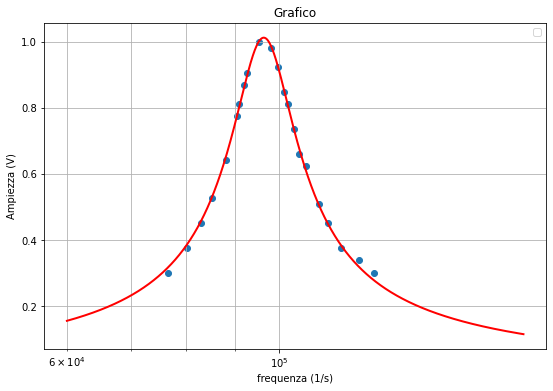

No handles with labels found to put in legend.


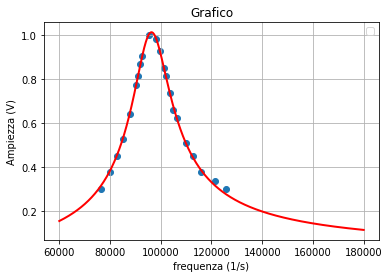

A = 1.0
R_l/R = -0.011586358102544986
L/R = -6.673278097247735e-05
tau = -1.6140461800128566e-06


In [ ]:

fitplot(x, y, 1, 1, 1.6E-4, -10E-10)

In [ ]:
R_l = 0.011586358102544986 * 220
L = 6.673278097247735e-05 * 220
c = -1.6140461800128566e-06 / 220

print(f"R_L = {R_l} ohm\nL = {L} H\nC = {c} F")

R_L = 2.548998782559897 ohm
L = 0.014681211813945015 H
C = -7.336573545512985e-09 F


# Diodi

## Raccolgo I Dati